This Jupyter Notebook was developed in Google Collab by Mya Yazbek on 3/10/2022. 

#Framing this project:

This is data of [USDA's SNOTEL](https://www.nrcs.usda.gov/wps/portal/wcc/home/quicklinks/imap#version=158&elements=R&networks=!&states=AZ,CO,UT,WY&counties=!&hucs=&minElevation=&maxElevation=&elementSelectType=all&activeOnly=true&activeForecastPointsOnly=false&hucLabels=false&hucIdLabels=false&hucParameterLabels=false&stationLabels=name,id&overlays=&hucOverlays=az_8,co_8,ut_8,wy_8&basinOpacity=100&basinNoDataOpacity=100&basemapOpacity=100&maskOpacity=0&mode=data&openSections=dataElement,parameter,date,basin,options,elements,location,networks,baseMaps,overlays,labels&controlsOpen=true&popup=&popupMulti=&popupBasin=&base=esriNgwm&displayType=station&basinType=6&dataElement=WTEQ&depth=-8&parameter=PCTMED&frequency=DAILY&duration=I&customDuration=1&dayPart=E&monthPart=E&forecastPubDay=1&forecastExceedance=50&seqColor=1&divColor=3&scaleType=D&scaleMin=&scaleMax=&referencePeriodType=POR&referenceBegin=1981&referenceEnd=2020&minimumYears=20&hucAssociations=true&relativeDate=-1&lat=38.085&lon=-110.948&zoom=6.5) real time climate monitoring stations. The three stations you will be analyzing are found in the Southern Utah Basin of the Colorado River Watershed. You will select one SNOTEL station's climate data to use for a river flow model out of 3 to be included in a final dataset. The different stations in the file are denoted by the unique identifiers at the beginning of each column name. These three SNOTEL sites all hold data on precipitation, snow water equivalent, soil moisture, soil temperature, and air temperature. You will select the attributes that exhibit the strongest correlation coeff when running against DC_Inflow, which is a site that monitors river discharge rates near Diamond Creek, AZ. The Colorado River Discharge rate was provided by the USGS National Water Information System website's [listing for the gauge near Diamond Creek](https://waterdata.usgs.gov/nwis/inventory?site_no=09404200). Both these datasets span 15 years, from Jan. 2006 - Dec 2020. 

The file I am using for this coding session has the USDA and USGS data in csv format, which is up on my github as "SNOTEL_Site_Selection.csv" 

#Step 1: Importing our packages

In [513]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Great! All packages needed for cleaning, viewing, and analyzing are ready to use.

#Step 2: Mounting Google Drive

In [514]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The above code mounts your drive. Select your account and press accept. You can now access your account files, which is where I have the csv file to load into a Pandas DataFrame.

#Step 3: Load and View Data

In [515]:
#navigate to the file in your google drive by selecting the file folder 
#icon to the left of this text

file = "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/Report/Model_Building/SNOTEL_Site_Selection.csv"

In [516]:
data = pd.read_csv(file)

In [517]:
data.head()

,Date,DC_Inflow,Camp_Jackson_(383)\nSWE_in\n,Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n,Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n,Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n,East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n,East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n,East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n,East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n,Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n,Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n,Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n,Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n,Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n
0,1/1/2006,"13,970",0.8,3.8,29,33,9.0,0.9,2.0,31,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"15,450",2.8,5.3,27,33,9.2,1.8,3.0,25,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,020",2.9,5.8,33,34,11.3,1.8,3.3,36,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"11,100",8.1,11.2,31,35,33.3,4.1,6.4,34,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"10,630",0.0,12.4,45,46,23.8,0.0,6.9,41,47.0,17.2,0.0,21.0,NaN,50.0,12.6


In [518]:
#data.info()

#Step 4: Cleaning your dataset

Filling nulls

In [519]:
data2 = data.fillna(method="ffill")

Renaming columns for accessibility

Start with putting our column names in a list

In [520]:
my_list = data2.columns.values.tolist()

print(my_list)

['Date', 'DC_Inflow', 'Camp_Jackson_(383)\nSWE_in\n', 'Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n', 'Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n', 'Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n', 'East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n', 'East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n', 'East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n', 'East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n', 'Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n', 'Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n', 'Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n', 'Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n', 'Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n']


In [521]:
print(len(my_list))

17


We will now rename the columns using .rename()

In [522]:
data3 = data2.rename(columns={'Date':"Date", 'Diamond_Creek_Inflow_Guage':"DC_Inflow", 'Camp_Jackson_(383)\nSWE_in\n':"CJ383_SWE_IN", 'Camp_Jackson_(383)\nPrecipitation\nAccumulation\n(in)\n':"CJ383_PA_IN", 'Camp_Jackson_(383)\nAir\nTemperature\nObserved\n(degF)\n':"CJ383_ATO_DEGF", 'Camp_Jackson_(383)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"CJ383_STO_2IN_DEGF", 'Camp_Jackson_(383)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"CJ383_SMP_2IN_PCT", 'East_Willow_Creek_(461)\nSnow\nWater\nEquivalent\n(in)\n':"EWC461_SWE_IN", 'East_Willow_Creek_(461)\nPrecipitation\nAccumulation\n(in)\n':"EWC461_PA_IN", 'East_Willow_Creek_(461)\nAir\nTemperature\nObserved\n(degF)\n':"EWC461_ATO_DEGF", 'East_Willow_Creek_(461)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"EWC461_STO_2IN_DEGF", 'East_Willow_Creek_(461)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"EWC461_SMP_2IN_PCT", 'Lasal_Mountain_(572)\nSnow\nWater\nEquivalent\n(in)\n':"LM572_SWE_IN", 'Lasal_Mountain_(572)\nPrecipitation\nAccumulation\n(in)\n':"LM572_PA_IN", 'Lasal_Mountain_(572)\nAir\nTemperature\nObserved\n(degF)\n':"LM572_ATO_2IN_DEGF", 'Lasal_Mountain_(572)\nSoil\nTemperature\nObserved_-2in\n(degF)\n':"LM572_STO_2IN_DEGF", 'Lasal_Mountain_(572)\nSoil\nMoisture\nPercent_-2in\n(pct)\n':"LM572_SMP_2IN_PCT"})


In [523]:
my_list2 = data3.columns.values.tolist()

print(my_list2)

['Date', 'DC_Inflow', 'CJ383_SWE_IN', 'CJ383_PA_IN', 'CJ383_ATO_DEGF', 'CJ383_STO_2IN_DEGF', 'CJ383_SMP_2IN_PCT', 'EWC461_SWE_IN', 'EWC461_PA_IN', 'EWC461_ATO_DEGF', 'EWC461_STO_2IN_DEGF', 'EWC461_SMP_2IN_PCT', 'LM572_SWE_IN', 'LM572_PA_IN', 'LM572_ATO_2IN_DEGF', 'LM572_STO_2IN_DEGF', 'LM572_SMP_2IN_PCT']


In [524]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PA_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,"13,970",0.8,3.8,29,33,9.0,0.9,2.0,31,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"15,450",2.8,5.3,27,33,9.2,1.8,3.0,25,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,020",2.9,5.8,33,34,11.3,1.8,3.3,36,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"11,100",8.1,11.2,31,35,33.3,4.1,6.4,34,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"10,630",0.0,12.4,45,46,23.8,0.0,6.9,41,47.0,17.2,0.0,21.0,31.0,50.0,12.6


#Step 5: Visualizing your data

Lets plot the Soil Temp Observed at a 2 inch depth in Degree Farenheit at the Lasal Mountain observation site. 

In [525]:
x_axis = data3["Date"]
y_axis = data3["LM572_STO_2IN_DEGF"]

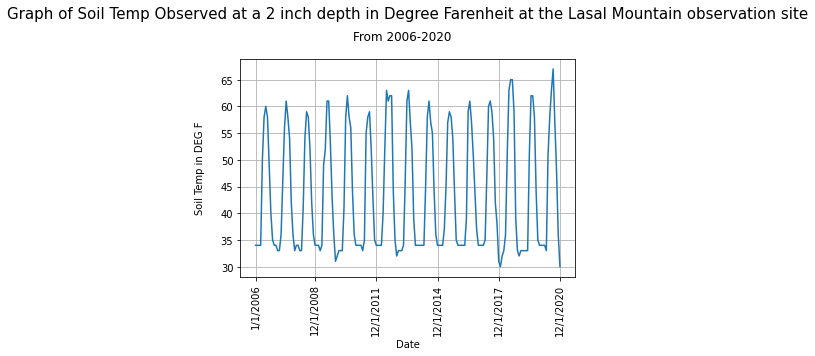

In [526]:
plt.plot(x_axis, y_axis)
plt.grid(True)
plt.title("Graph of Soil Temp Observed at a 2 inch depth in Degree Farenheit at the Lasal Mountain observation site\n\n", size = 15)
plt.suptitle("From 2006-2020")
plt.xlabel("Date")
plt.ylabel("Soil Temp in DEG F\n")

positions = [0, 35, 71, 107, 143, 179]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])


#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

Now Let's plot Precipitation at Camp Jackson, Lasal Mountain, and East Willow Creek over 15 years

In [527]:
x = data3["Date"]
y1 = data3["CJ383_PA_IN"]
y2 = data3["EWC461_PA_IN"]
y3 = data3["LM572_PA_IN"]

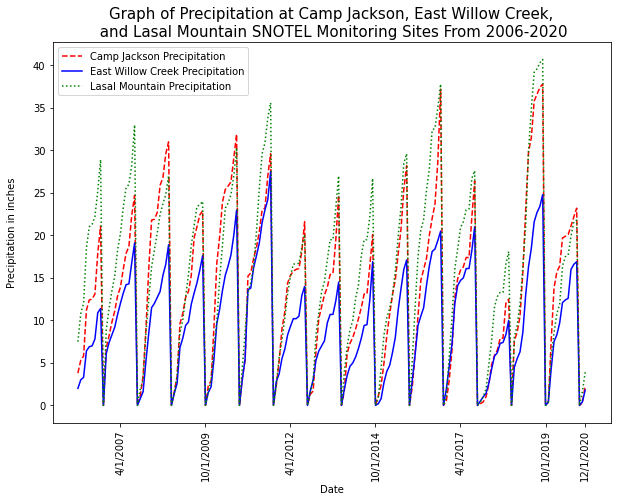

In [528]:
plt.figure(figsize = (10, 7))

# Plot 1st line
plt.plot(x, y1, 'r', linestyle= 'dashed', label = "Camp Jackson Precipitation")

# Plot 2nd line
plt.plot(x, y2, 'b', label="East Willow Creek Precipitation")

# Plot 3rd line
plt.plot(x, y3, 'g', linestyle = 'dotted', label='Lasal Mountain Precipitation');

plt.title("Graph of Precipitation at Camp Jackson, East Willow Creek,\n and Lasal Mountain SNOTEL Monitoring Sites From 2006-2020", size = 15)
plt.suptitle("")
plt.xlabel("Date")
plt.ylabel("Precipitation in inches\n")


positions = [15, 45, 75, 105, 135, 165, 179]
pos_list = []

for num in positions:
  pos_list.append(x_axis.iloc[num])

plt.legend()
#print(pos_list)
plt.xticks(ticks = positions, labels = pos_list, rotation = 'vertical');

#Step 6: Attribute Selection

In [529]:
data_matrix = data3.corr()

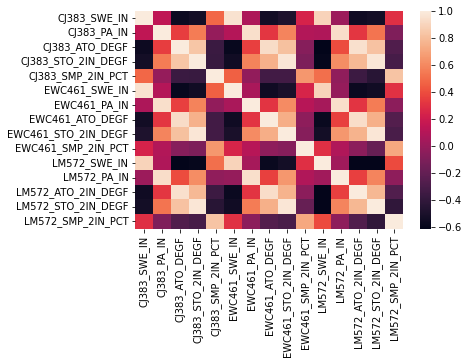

In [530]:
sns.heatmap(data_matrix)

So this is a heatmap of all 5 climate variables from each of the 3 SNOTEL sites (15 attributes total). Let's look at all of the Snow Water Equivalent in inches across our 3 sites to see if they correlate to one another above 95%, as this is the threshold for redundancies among attributes.

The above heatmap substantiates our investigation and removal of redundant variables. The lighter boxes indicate a very high correlation, and their uniform distribute is also a telling sign that your attributes have variables that are being over accounted for in your model. Drawing us back to our main goal: we will select the attributes with the highest correlation to DC_Inflow out of 3 stations, or select a combination of attributes if different station features show high correlation rates at differing sites. For example, if CJ383_SWE_IN, or Camp Jackson's Snow Water Equivalent (inches), is the attribute had the highest correlation among the sites with DC_Inflow, but Camp Jackson's Soil Temperature Observered at 2in Depth, in Degrees F (CJ393_STO_2IN_DEGF) is least correlated with DC_Inflow among the three recorded Soil Temperature, then we can select a Soil Temperature Observed attribute from a different station that has a higher correlation with our variable of interest (DC_Inflow). 

In [531]:
new_attribs = data3[["Date", "DC_Inflow", "CJ383_SWE_IN", "EWC461_SWE_IN", "LM572_SWE_IN"]].copy()

In [532]:
cor_matrix_3 = new_attribs.corr()

In [533]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN,LM572_SWE_IN
0,1/1/2006,"13,970",0.8,0.9,3.8
1,2/1/2006,"15,450",2.8,1.8,6.8
2,3/1/2006,"11,020",2.9,1.8,7.3
3,4/1/2006,"11,100",8.1,4.1,11.7
4,5/1/2006,"10,630",0.0,0.0,0.0


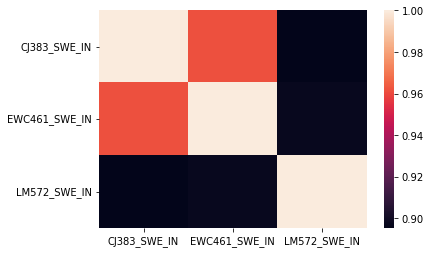

In [534]:
sns.heatmap(cor_matrix_3)

The reason DC_Inflow wasn't showing up is because our DC_Inflow data has a comma in it and our program doesn't like that. Lets remove it. 

#Step 7: More Data Manipulation

In [535]:
new_attribs.replace(',','', regex=True, inplace=True)

In [536]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN,LM572_SWE_IN
0,1/1/2006,13970,0.8,0.9,3.8
1,2/1/2006,15450,2.8,1.8,6.8
2,3/1/2006,11020,2.9,1.8,7.3
3,4/1/2006,11100,8.1,4.1,11.7
4,5/1/2006,10630,0.0,0.0,0.0


All occurences of the , in the DC_Inflow column are now removed.

The rest of our data is a float data type, so we should convert DC_Inflow to a float as well. 

In [537]:
new_attribs["DC_Inflow"] = pd.to_numeric(new_attribs["DC_Inflow"], downcast="float")

In [538]:
new_attribs.head()

,Date,DC_Inflow,CJ383_SWE_IN,EWC461_SWE_IN,LM572_SWE_IN
0,1/1/2006,13970.0,0.8,0.9,3.8
1,2/1/2006,15450.0,2.8,1.8,6.8
2,3/1/2006,11020.0,2.9,1.8,7.3
3,4/1/2006,11100.0,8.1,4.1,11.7
4,5/1/2006,10630.0,0.0,0.0,0.0


Okay, everything we needed to fix in this dataset should be good for further analyses

#Step 8: More heatmaps

Lets try our correlation coefficient heatmap again. 

In [539]:
another_corr_matrix = new_attribs.corr()

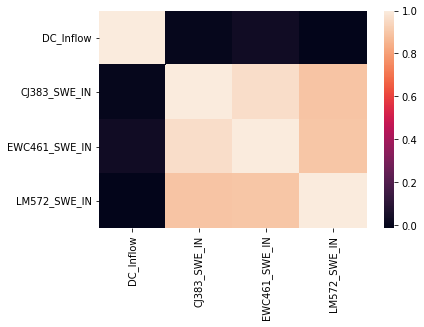

In [540]:
sns.heatmap(another_corr_matrix)

DC Inflow is not highly correlated to SWE in any sites, but the SWE of each site has a high correlation to one another. 

In [541]:
print(another_corr_matrix)

               DC_Inflow  CJ383_SWE_IN  EWC461_SWE_IN  LM572_SWE_IN
DC_Inflow       1.000000     -0.000690       0.031455     -0.014039
CJ383_SWE_IN   -0.000690      1.000000       0.961634      0.895354
EWC461_SWE_IN   0.031455      0.961634       1.000000      0.897485
LM572_SWE_IN   -0.014039      0.895354       0.897485      1.000000


In [542]:
corr_matrix3 = another_corr_matrix["DC_Inflow"].sort_values(ascending=False) 

print(corr_matrix3)

DC_Inflow        1.000000
EWC461_SWE_IN    0.031455
CJ383_SWE_IN    -0.000690
LM572_SWE_IN    -0.014039
Name: DC_Inflow, dtype: float64


These three stations have a negative correlation when compared with DC_Inflow. The highest absolute value coming from the East Willow Creek Snow Water Equivalent IN. Lets see how our other variables like soil moisture and temp compare.

For this, we will revist our main dataset in the data3 variable. Lets do the same cleaning methods we did for DC_Inflow like removing commas and changing the dtype to float. 

In [543]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PA_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,"13,970",0.8,3.8,29,33,9.0,0.9,2.0,31,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,"15,450",2.8,5.3,27,33,9.2,1.8,3.0,25,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,"11,020",2.9,5.8,33,34,11.3,1.8,3.3,36,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,"11,100",8.1,11.2,31,35,33.3,4.1,6.4,34,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,"10,630",0.0,12.4,45,46,23.8,0.0,6.9,41,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [544]:
data3["DC_Inflow"] = pd.to_numeric(new_attribs["DC_Inflow"], downcast="float")

In [545]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PA_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,13970.0,0.8,3.8,29,33,9.0,0.9,2.0,31,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,15450.0,2.8,5.3,27,33,9.2,1.8,3.0,25,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,11020.0,2.9,5.8,33,34,11.3,1.8,3.3,36,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,11100.0,8.1,11.2,31,35,33.3,4.1,6.4,34,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,10630.0,0.0,12.4,45,46,23.8,0.0,6.9,41,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [546]:
here_we_go_again = data3.corr()

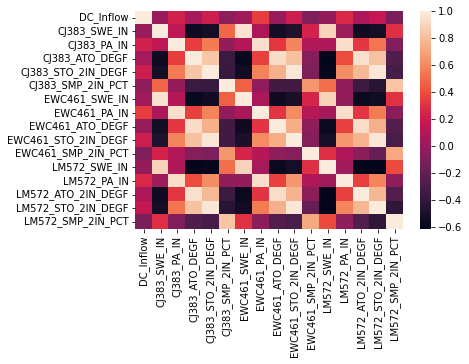

In [547]:
sns.heatmap(here_we_go_again)

#Step 9: Final Selection

Lets find out which weather station/attribute has most effect on our dependent variable DC_Inflow

In [548]:
corr_matrix3 = here_we_go_again["DC_Inflow"].sort_values(ascending=False) 

print(corr_matrix3)

DC_Inflow              1.000000
EWC461_PA_IN           0.346120
LM572_PA_IN            0.263025
CJ383_PA_IN            0.230374
EWC461_STO_2IN_DEGF    0.201842
CJ383_STO_2IN_DEGF     0.199955
LM572_STO_2IN_DEGF     0.173425
LM572_ATO_2IN_DEGF     0.074646
CJ383_ATO_DEGF         0.050714
EWC461_SWE_IN          0.031455
EWC461_ATO_DEGF        0.001367
CJ383_SWE_IN          -0.000690
LM572_SWE_IN          -0.014039
CJ383_SMP_2IN_PCT     -0.036418
EWC461_SMP_2IN_PCT    -0.091350
LM572_SMP_2IN_PCT     -0.114646
Name: DC_Inflow, dtype: float64


The highest correlation coefficient when compared against DC_Inflow is the Precipitation Accumulation of East Willow Creek (in inches), coming in at 0.34!

In [549]:
corr_matrix4 = here_we_go_again["EWC461_PA_IN"].sort_values(ascending=False) 

print(corr_matrix4)

EWC461_PA_IN           1.000000
CJ383_PA_IN            0.948958
LM572_PA_IN            0.946573
EWC461_STO_2IN_DEGF    0.614017
CJ383_STO_2IN_DEGF     0.578442
LM572_STO_2IN_DEGF     0.552213
CJ383_ATO_DEGF         0.350919
DC_Inflow              0.346120
LM572_ATO_2IN_DEGF     0.316377
EWC461_ATO_DEGF        0.315609
EWC461_SMP_2IN_PCT     0.111209
CJ383_SWE_IN           0.073846
EWC461_SWE_IN          0.064335
LM572_SWE_IN           0.049838
CJ383_SMP_2IN_PCT     -0.027052
LM572_SMP_2IN_PCT     -0.046585
Name: EWC461_PA_IN, dtype: float64


In [550]:
corr_matrix5 = here_we_go_again["EWC461_STO_2IN_DEGF"].sort_values(ascending=False) 

print(corr_matrix5)


EWC461_STO_2IN_DEGF    1.000000
CJ383_STO_2IN_DEGF     0.979634
LM572_STO_2IN_DEGF     0.977038
CJ383_ATO_DEGF         0.819381
LM572_ATO_2IN_DEGF     0.765088
EWC461_ATO_DEGF        0.744088
LM572_PA_IN            0.656872
EWC461_PA_IN           0.614017
CJ383_PA_IN            0.588346
DC_Inflow              0.201842
EWC461_SMP_2IN_PCT    -0.067523
LM572_SMP_2IN_PCT     -0.299910
CJ383_SMP_2IN_PCT     -0.335661
CJ383_SWE_IN          -0.483248
EWC461_SWE_IN         -0.501982
LM572_SWE_IN          -0.529096
Name: EWC461_STO_2IN_DEGF, dtype: float64


What we're doing here is going one by one down the list of attributes and seeing which station has the highest corr coef to select a combination of ones for our final model. So far its  **EWC461_PA_IN** which is the code for East Willow Creek Precipitation Accumulation in Inches and **EWC461_STO_2IN_DEGF**, which is the East Willow Creek Soil Temperature Observed. Next we'll look at **LM572_ATO_2IN_DEGF**, **EWC461_SWE_IN**, and lastly **LM572_SMP_2IN_PCT**

In [551]:
corr_matrix6 = here_we_go_again["LM572_ATO_2IN_DEGF"].sort_values(ascending=False) 

print(corr_matrix6)

LM572_ATO_2IN_DEGF     1.000000
CJ383_ATO_DEGF         0.951097
EWC461_ATO_DEGF        0.940577
CJ383_STO_2IN_DEGF     0.791168
LM572_STO_2IN_DEGF     0.781453
EWC461_STO_2IN_DEGF    0.765088
LM572_PA_IN            0.351078
CJ383_PA_IN            0.323306
EWC461_PA_IN           0.316377
DC_Inflow              0.074646
EWC461_SMP_2IN_PCT    -0.051676
LM572_SMP_2IN_PCT     -0.271670
CJ383_SMP_2IN_PCT     -0.360513
CJ383_SWE_IN          -0.548056
EWC461_SWE_IN         -0.569192
LM572_SWE_IN          -0.606592
Name: LM572_ATO_2IN_DEGF, dtype: float64


In [552]:
almost_there = here_we_go_again["EWC461_SWE_IN"].sort_values(ascending=False) 

print(almost_there)

EWC461_SWE_IN          1.000000
CJ383_SWE_IN           0.961634
LM572_SWE_IN           0.897485
CJ383_SMP_2IN_PCT      0.459706
LM572_SMP_2IN_PCT      0.305024
EWC461_SMP_2IN_PCT     0.245658
CJ383_PA_IN            0.099422
EWC461_PA_IN           0.064335
DC_Inflow              0.031455
LM572_PA_IN           -0.014479
EWC461_STO_2IN_DEGF   -0.501982
LM572_STO_2IN_DEGF    -0.540328
CJ383_STO_2IN_DEGF    -0.544616
EWC461_ATO_DEGF       -0.548680
LM572_ATO_2IN_DEGF    -0.569192
CJ383_ATO_DEGF        -0.579618
Name: EWC461_SWE_IN, dtype: float64


In [553]:
last_corr_matrix = here_we_go_again["LM572_SMP_2IN_PCT"].sort_values(ascending=False)

print(last_corr_matrix)

LM572_SMP_2IN_PCT      1.000000
CJ383_SMP_2IN_PCT      0.834320
EWC461_SMP_2IN_PCT     0.722368
LM572_SWE_IN           0.394342
EWC461_SWE_IN          0.305024
CJ383_SWE_IN           0.299405
LM572_PA_IN           -0.040087
EWC461_PA_IN          -0.046585
CJ383_PA_IN           -0.092017
DC_Inflow             -0.114646
EWC461_ATO_DEGF       -0.264070
LM572_ATO_2IN_DEGF    -0.271670
CJ383_ATO_DEGF        -0.276169
EWC461_STO_2IN_DEGF   -0.299910
CJ383_STO_2IN_DEGF    -0.314867
LM572_STO_2IN_DEGF    -0.409034
Name: LM572_SMP_2IN_PCT, dtype: float64


So the columns of the dataframe listed above will be made into a new csv file and saved on this here drive. 

Just to refresh, the columns are: EWC461_PA_IN, EWC461_STO_2IN_DEGF, LM572_ATO_2IN_DEGF, EWC461_SWE_IN, and LM572_SMP_2IN_PCT.

In [554]:
data3.head()

,Date,DC_Inflow,CJ383_SWE_IN,CJ383_PA_IN,CJ383_ATO_DEGF,CJ383_STO_2IN_DEGF,CJ383_SMP_2IN_PCT,EWC461_SWE_IN,EWC461_PA_IN,EWC461_ATO_DEGF,EWC461_STO_2IN_DEGF,EWC461_SMP_2IN_PCT,LM572_SWE_IN,LM572_PA_IN,LM572_ATO_2IN_DEGF,LM572_STO_2IN_DEGF,LM572_SMP_2IN_PCT
0,1/1/2006,13970.0,0.8,3.8,29,33,9.0,0.9,2.0,31,NaN,NaN,3.8,7.5,28.0,34.0,5.1
1,2/1/2006,15450.0,2.8,5.3,27,33,9.2,1.8,3.0,25,22.0,7.4,6.8,10.8,22.0,34.0,6.0
2,3/1/2006,11020.0,2.9,5.8,33,34,11.3,1.8,3.3,36,29.0,11.7,7.3,12.0,33.0,34.0,12.0
3,4/1/2006,11100.0,8.1,11.2,31,35,33.3,4.1,6.4,34,34.0,27.4,11.7,18.5,31.0,34.0,25.7
4,5/1/2006,10630.0,0.0,12.4,45,46,23.8,0.0,6.9,41,47.0,17.2,0.0,21.0,31.0,50.0,12.6


In [555]:
final_dataset = data3[["EWC461_PA_IN", "EWC461_STO_2IN_DEGF", "LM572_ATO_2IN_DEGF", "EWC461_SWE_IN", "LM572_SMP_2IN_PCT"]].copy()

One last corr  heatmap with the attributes we picked out just for the fun of it (against DC_Inflow)

In [556]:
one_last_time = data3[["DC_Inflow", "CJ383_SMP_2IN_PCT", "EWC461_ATO_DEGF", "EWC461_PA_IN", "EWC461_SWE_IN"]].copy()

In [557]:
one_last_kiss_i_mean_corr = one_last_time.corr()

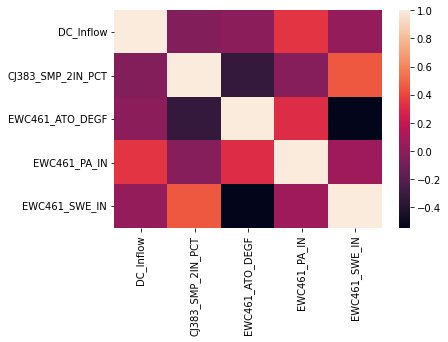

In [558]:
sns.heatmap(one_last_kiss_i_mean_corr)

Beautiful! Now thats what a corr heatmap should look like with 0 redundancies.

#Step 10: Reviewing and Saving your new dataset

Lets look at the header to make sure we have everything we need before we save this final dataframe to a csv file.

In [559]:
final_dataset.head()

,EWC461_PA_IN,EWC461_STO_2IN_DEGF,LM572_ATO_2IN_DEGF,EWC461_SWE_IN,LM572_SMP_2IN_PCT
0,2.0,NaN,28.0,0.9,5.1
1,3.0,22.0,22.0,1.8,6.0
2,3.3,29.0,33.0,1.8,12.0
3,6.4,34.0,31.0,4.1,25.7
4,6.9,47.0,31.0,0.0,12.6


Yep, Everything's there! We will save this to a csv file called "final_data.csv"

In [560]:
final_dataset.to_csv('final_data.csv')
!cp final_data.csv "/content/drive/MyDrive/CURRENT Work files/GBI/Research Project/Report/Model_Building"

The above code automatically places the new file in the folder you tell it to. You need the last line of code if you are running this program in google collab (.ipynb)

#This is the end of Mya's introductory data exploration tutorial.